In [1]:
import pandas as pd 
import numpy as np
from collections import defaultdict
from matplotlib import pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
df = pd.read_csv(r"C:\Users\araca\Documents\UNIVERSIDAD\PROYECTO DE DATOS I\df_limpio.csv")
df['DATE'] = pd.to_datetime(df['DATE'])  # Convertir la columna a tipo datetime si no lo está
df = df.sort_values(by='DATE', ascending=True)  # Ordenar de más antiguo a más reciente
df


,Unnamed: 0,index,Peleador_A,Peleador_B,DATE,CATEGORY,WINNER,METHOD,TIME,ROUND,...,STR_CLINCH_A_x,STR_CLINCH_A_y,STR_CLINCH_B_x,STR_CLINCH_B_y,STR_GROUND_A_x,STR_GROUND_A_y,STR_GROUND_B_x,STR_GROUND_B_y,TITLE_FIGHT,WOMEN
0,0,2517,Laverne Clark,Frank Caracci,1999-01-08,LIGHTWEIGHT,0,KO/TKO,412,1,...,0,0,0,0,14,26,0,0,False,False
1,1,2516,Evan Tanner,Darrel Gholar,1999-01-08,MIDDLEWEIGHT,0,Submission,477,1,...,14,21,0,0,0,0,4,12,False,False
2,2,2515,Mikey Burnett,Townsend Saunders,1999-01-08,LIGHTWEIGHT,0,Decision - Unanimous,180,2,...,19,37,14,18,2,9,0,0,False,False
3,3,2514,Tito Ortiz,Jerry Bohlander,1999-01-08,MIDDLEWEIGHT,0,TKO - Doctor's Stoppage,151,2,...,7,12,1,4,18,35,1,1,False,False
4,4,2513,Pedro Rizzo,Mark Coleman,1999-01-08,HEAVYWEIGHT,0,Decision - Split,180,2,...,1,1,0,1,0,0,18,29,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7833,7833,2528,Jonathan Micallef,Kevin Jousset,2025-02-15,WELTERWEIGHT,0,Decision - Unanimous,300,3,...,2,2,1,2,0,0,0,0,False,False
7832,7832,2529,Quillan Salkilld,Anshul Jubli,2025-02-15,LIGHTWEIGHT,0,KO/TKO,19,1,...,0,0,0,0,1,1,0,0,False,False
7842,7842,2518,Dricus Du Plessis,Sean Strickland,2025-02-15,MIDDLEWEIGHT,0,Decision - Unanimous,300,5,...,0,0,0,0,0,0,0,0,True,False
7836,7836,2525,Wang Cong,Bruna Brasil,2025-02-15,FLYWEIGHT,0,Decision - Unanimous,300,3,...,0,1,1,1,1,3,0,0,False,True


In [ ]:
df.columns

Index(['Unnamed: 0', 'index', 'Peleador_A', 'Peleador_B', 'DATE', 'CATEGORY',
       'WINNER', 'METHOD', 'TIME', 'ROUND', 'KD_A', 'KD_B', 'SIG_STR_A',
       'SIG_STR_B', 'TD_PORC_A', 'TD_PORC_B', 'SUB_ATT_A', 'SUB_ATT_B',
       'REV_A', 'REV_B', 'CTRL_A', 'CTRL_B', 'TOTAL_STR_A_x', 'TOTAL_STR_A_y',
       'TOTAL_STR_B_x', 'TOTAL_STR_B_y', 'TD_A_x', 'TD_A_y', 'TD_B_x',
       'TD_B_y', 'STR_HEAD_A_x', 'STR_HEAD_A_y', 'STR_HEAD_B_x',
       'STR_HEAD_B_y', 'STR_BODY_A_x', 'STR_BODY_A_y', 'STR_BODY_B_x',
       'STR_BODY_B_y', 'STR_LEG_A_x', 'STR_LEG_A_y', 'STR_LEG_B_x',
       'STR_LEG_B_y', 'STR_DISTANCE_A_x', 'STR_DISTANCE_A_y',
       'STR_DISTANCE_B_x', 'STR_DISTANCE_B_y', 'STR_CLINCH_A_x',
       'STR_CLINCH_A_y', 'STR_CLINCH_B_x', 'STR_CLINCH_B_y', 'STR_GROUND_A_x',
       'STR_GROUND_A_y', 'STR_GROUND_B_x', 'STR_GROUND_B_y', 'TITLE_FIGHT',
       'WOMEN'],
      dtype='object')

In [ ]:
# Asegurar que la fecha esté en formato datetime y ordenar por fecha
df["DATE"] = pd.to_datetime(df["DATE"])
df = df.sort_values(by="DATE")

# Lista de estadísticas a acumular
stats = ["KD_A", "KD_B", "SIG_STR_A", "SIG_STR_B", "TD_PORC_A", "TD_PORC_B", "SUB_ATT_A","SUB_ATT_B", "REV", "CTRL", 
         "TOTAL_STR_A_x", "TOTAL_STR_A_y", "TOTAL_STR_B_x", "TOTAL_STR_B_y",
         "TD_A_x", "TD_A_y", "TD_B_x", "TD_B_y",
         "STR_HEAD_A_x", "STR_HEAD_A_y", "STR_HEAD_B_x", "STR_HEAD_B_y",
         "STR_BODY_A_x", "STR_BODY_A_y", "STR_BODY_B_x", "STR_BODY_B_y",
         "STR_LEG_A_x", "STR_LEG_A_y", "STR_LEG_B_x", "STR_LEG_B_y",
         "STR_DISTANCE_A_x", "STR_DISTANCE_A_y", "STR_DISTANCE_B_x", "STR_DISTANCE_B_y",
         "STR_CLINCH_A_x", "STR_CLINCH_A_y", "STR_CLINCH_B_x", "STR_CLINCH_B_y",
         "STR_GROUND_A_x", "STR_GROUND_A_y", "STR_GROUND_B_x", "STR_GROUND_B_y"]

# Crear nuevas columnas acumulativas para cada peleador
acumulated_stats = []

for stat in stats:
    if "_A" in stat:  # Si la estadística pertenece al peleador A
        peleador = "Peleador_A"
    elif "_B" in stat:  # Si la estadística pertenece al peleador B
        peleador = "Peleador_B"
    else:
        continue  # Si no tiene _A o _B, la ignoramos
    
    # Calcular la media acumulativa incluyendo la pelea actual
    df[f"{stat}_mean"] = df.groupby(peleador, group_keys=False)[stat].expanding().mean().reset_index(level=0, drop=True)
    
    # Redondear a dos decimales
    df[f"{stat}_mean"] = df[f"{stat}_mean"].round(2)
    
    acumulated_stats.append(f"{stat}_mean")

# Crear un nuevo DataFrame solo con las estadísticas acumuladas
df_acumulado = df[["Peleador_A", "Peleador_B", "DATE", "WINNER"] + acumulated_stats]

df_acumulado


NameError: name 'pd' is not defined

In [ ]:
df_acumulado[(df_acumulado["Peleador_A"] == "Ilia Topuria") | (df_acumulado["Peleador_B"] == "Ilia Topuria")]


,Peleador_A,Peleador_B,DATE,WINNER,KD_A_mean,KD_B_mean,SIG_STR_A_mean,SIG_STR_B_mean,TD_PORC_A_mean,TD_PORC_B_mean,...,STR_DISTANCE_B_x_mean,STR_DISTANCE_B_y_mean,STR_CLINCH_A_x_mean,STR_CLINCH_A_y_mean,STR_CLINCH_B_x_mean,STR_CLINCH_B_y_mean,STR_GROUND_A_x_mean,STR_GROUND_A_y_mean,STR_GROUND_B_x_mean,STR_GROUND_B_y_mean
5623,Youssef Zalal,Ilia Topuria,2020-10-10,1,0.50,0.00,0.45,0.39,0.30,0.55,...,12.00,30.00,1.50,2.50,1.00,2.00,6.00,10.00,0.00,1.00
5712,Ilia Topuria,Damon Jackson,2020-12-05,0,1.00,0.00,0.49,0.38,0.00,0.19,...,8.00,27.25,0.00,2.00,2.75,4.25,1.00,1.00,2.50,3.50
6000,Ryan Hall,Ilia Topuria,2021-07-10,1,0.00,0.00,0.58,0.48,0.00,0.28,...,7.50,19.00,0.00,0.00,0.50,1.00,1.00,1.00,7.50,12.50
6354,Jai Herbert,Ilia Topuria,2022-03-19,1,1.00,0.33,0.34,0.48,0.00,0.27,...,9.67,24.33,1.00,1.00,1.00,1.33,2.00,3.00,6.33,9.67
6737,Bryce Mitchell,Ilia Topuria,2022-12-10,1,0.00,0.50,0.63,0.48,0.53,0.20,...,14.50,34.25,0.40,0.80,1.50,2.00,12.60,16.20,6.75,9.50
7002,Josh Emmett,Ilia Topuria,2023-06-24,1,0.75,0.60,0.39,0.48,0.21,0.36,...,34.40,85.20,5.00,6.38,1.60,2.00,6.00,8.12,12.60,18.20
7327,Alexander Volkanovski,Ilia Topuria,2024-02-17,1,0.22,0.67,0.58,0.47,0.33,0.30,...,33.33,82.67,9.11,13.33,2.00,2.33,22.56,33.67,11.00,15.67
7705,Ilia Topuria,Max Holloway,2024-11-02,0,1.00,0.42,0.50,0.41,0.50,0.00,...,71.50,174.92,0.00,1.00,3.92,5.08,2.50,2.50,4.92,7.42


Resumen de datos:
<class 'pandas.core.frame.DataFrame'>
Index: 7844 entries, 0 to 7843
Data columns (total 59 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        7844 non-null   int64         
 1   index             7844 non-null   int64         
 2   Peleador_A        7844 non-null   object        
 3   Peleador_B        7844 non-null   object        
 4   DATE              7844 non-null   datetime64[ns]
 5   CATEGORY          7773 non-null   object        
 6   WINNER            7844 non-null   int64         
 7   METHOD            7844 non-null   object        
 8   TIME              7844 non-null   int64         
 9   ROUND             7844 non-null   int64         
 10  KD_A              7844 non-null   int64         
 11  KD_B              7844 non-null   int64         
 12  SIG_STR_A         7844 non-null   float64       
 13  SIG_STR_B         7844 non-null   float64       
 14  TD_PORC_A  

C:\Users\araca\AppData\Local\Temp\ipykernel_34892\1004412287.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['METHOD'], order=df['METHOD'].value_counts().index, palette='viridis')


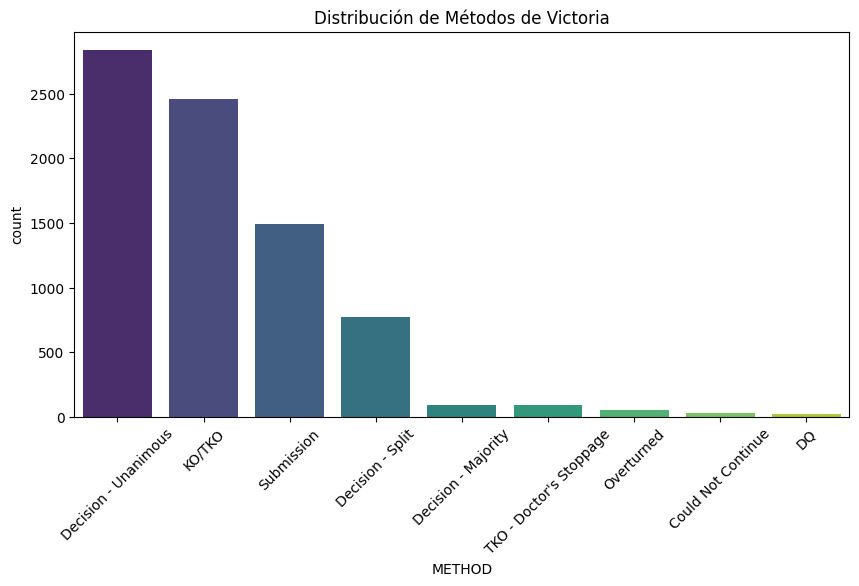

C:\Users\araca\AppData\Local\Temp\ipykernel_34892\1004412287.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['ROUND'], palette='coolwarm')


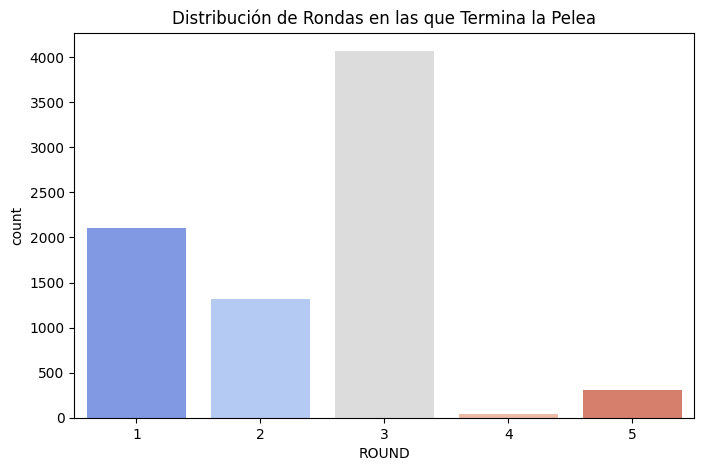

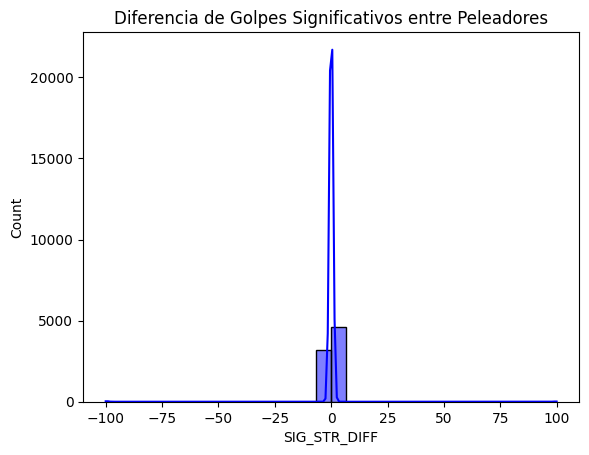

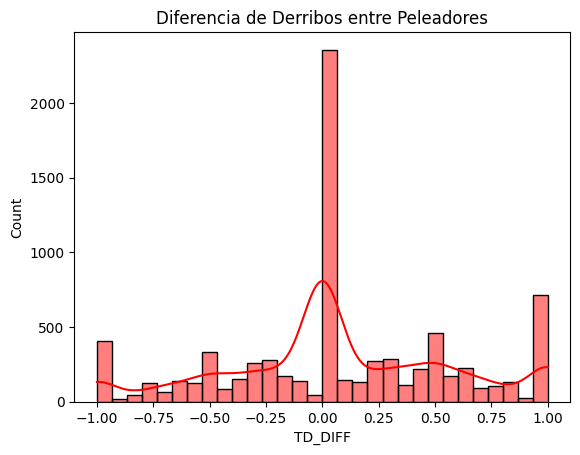

C:\Users\araca\AppData\Local\Temp\ipykernel_34892\1004412287.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['TITLE_FIGHT'], palette='pastel')


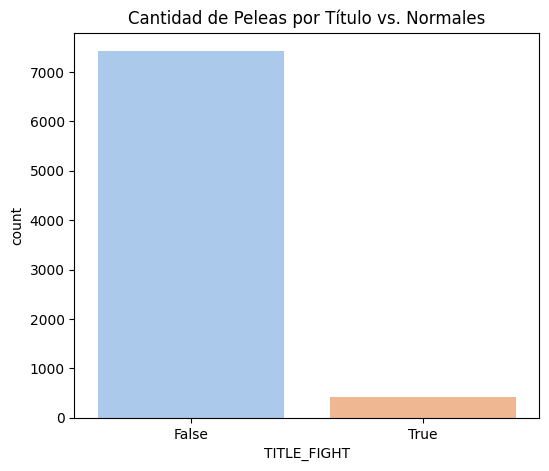

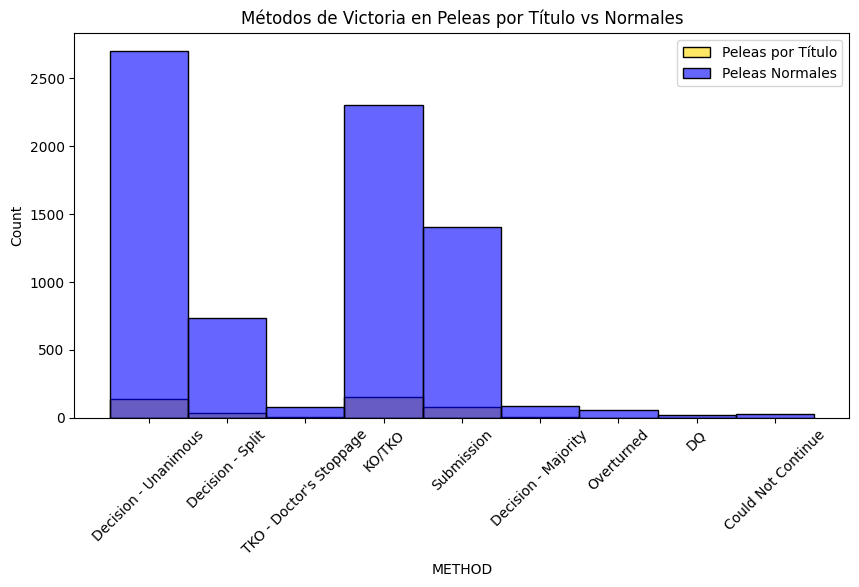

C:\Users\araca\AppData\Local\Temp\ipykernel_34892\1004412287.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Year'], palette='magma')


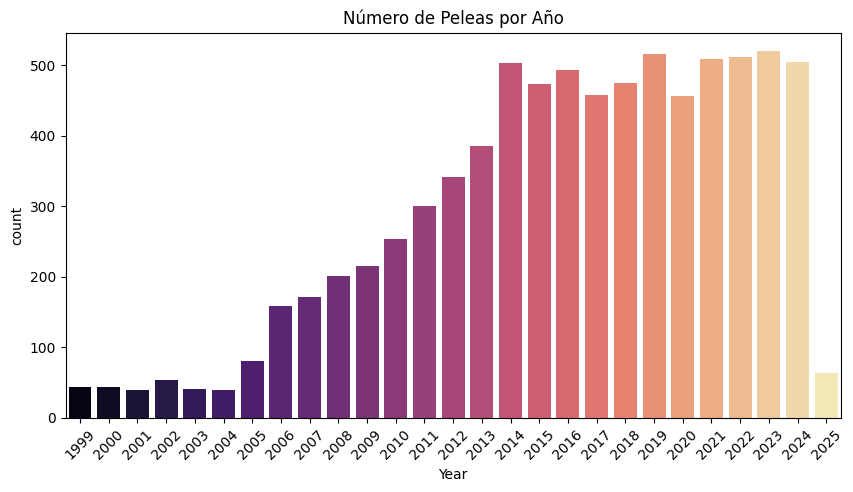

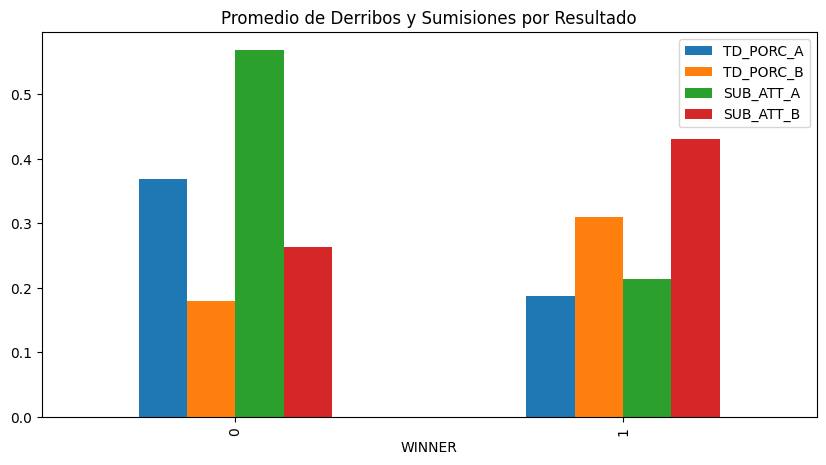

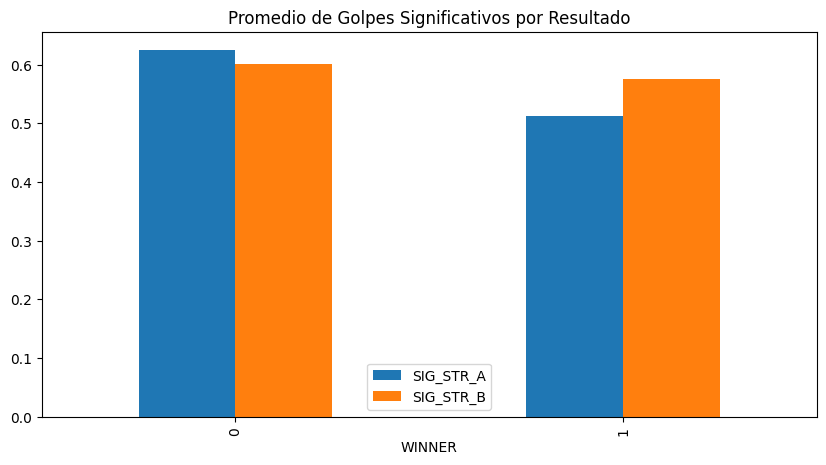

Análisis completado.


In [ ]:
# Explorar datos generales
print("Resumen de datos:")
print(df.info())
print("\
Valores nulos:")
print(df.isnull().sum())

# Estadísticas generales
df.describe()

# Visualizar distribución de métodos de victoria
plt.figure(figsize=(10,5))
sns.countplot(x=df['METHOD'], order=df['METHOD'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title("Distribución de Métodos de Victoria")
plt.show()

# Distribución de peleas por ronda de finalización
plt.figure(figsize=(8,5))
sns.countplot(x=df['ROUND'], palette='coolwarm')
plt.title("Distribución de Rondas en las que Termina la Pelea")
plt.show()

# Comparación de golpes significativos entre ganadores y perdedores
df['SIG_STR_DIFF'] = df['SIG_STR_A'] - df['SIG_STR_B']
sns.histplot(df['SIG_STR_DIFF'], kde=True, bins=30, color='blue')
plt.title("Diferencia de Golpes Significativos entre Peleadores")
plt.show()

# Comparación de derribos entre ganadores y perdedores
df['TD_DIFF'] = df['TD_PORC_A'] - df['TD_PORC_B']
sns.histplot(df['TD_DIFF'], kde=True, bins=30, color='red')
plt.title("Diferencia de Derribos entre Peleadores")
plt.show()

# Analizar peleas por título
plt.figure(figsize=(6,5))
sns.countplot(x=df['TITLE_FIGHT'], palette='pastel')
plt.title("Cantidad de Peleas por Título vs. Normales")
plt.show()

# Comparación de métodos de victoria en peleas por título vs normales
title_fights = df[df['TITLE_FIGHT'] == 1]
nontitle_fights = df[df['TITLE_FIGHT'] == 0]

plt.figure(figsize=(10,5))
sns.histplot(title_fights['METHOD'], color='gold', label='Peleas por Título', alpha=0.6)
sns.histplot(nontitle_fights['METHOD'], color='blue', label='Peleas Normales', alpha=0.6)
plt.xticks(rotation=45)
plt.title("Métodos de Victoria en Peleas por Título vs Normales")
plt.legend()
plt.show()

# Análisis de tendencias a lo largo del tiempo
df['DATE'] = pd.to_datetime(df['DATE'])  # Convertir fechas
df['Year'] = df['DATE'].dt.year
plt.figure(figsize=(10,5))
sns.countplot(x=df['Year'], palette='magma')
plt.xticks(rotation=45)
plt.title("Número de Peleas por Año")
plt.show()

# Analizar si los intentos de derribo o sumisión afectan el resultado
df[['WINNER', 'TD_PORC_A', 'TD_PORC_B', 'SUB_ATT_A', 'SUB_ATT_B']].groupby('WINNER').mean().plot(kind='bar', figsize=(10,5))
plt.title("Promedio de Derribos y Sumisiones por Resultado")
plt.show()

# Comparar golpes significativos por resultado
df[['WINNER', 'SIG_STR_A', 'SIG_STR_B']].groupby('WINNER').mean().plot(kind='bar', figsize=(10,5))
plt.title("Promedio de Golpes Significativos por Resultado")
plt.show()

print("Análisis completado.")
